In [29]:
import yfinance as yf
import pandas as pd

# Download Tesla stock data
tsla = yf.Ticker("TSLA")
tesla_data = tsla.history(period="max")

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())

# Save to a CSV file (optional)
tesla_data.to_csv("tesla_stock_data.csv", index=False)



                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [31]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# URL containing Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Download the webpage
html_data = requests.get(url).text

# Parse the HTML using BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Find the table containing Tesla revenue data
tables = soup.find_all("table")

# Convert the table to a DataFrame
tesla_revenue = pd.read_html(str(tables[0]))[0]

# Rename columns for clarity
tesla_revenue.columns = ["Date", "Revenue"]

# Clean the Revenue column (remove $ and commas)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].replace(r"[\$,]", "", regex=True)

# Drop empty rows
tesla_revenue.dropna(inplace=True)

# Display the last five rows
print(tesla_revenue.tail())

# Save to CSV (optional)
tesla_revenue.to_csv("tesla_revenue_data.csv", index=False)


    Date Revenue
8   2013    2013
9   2012     413
10  2011     204
11  2010     117
12  2009     112


In [33]:
import yfinance as yf

# Create a Ticker object for GameStop
gme_ticker = yf.Ticker("GME")

# Extract historical stock data with the maximum available period
gme_data = gme_ticker.history(period="max")

# Check if data is empty
if gme_data.empty:
    print("⚠️ Error: No GameStop stock data found. Check yfinance connectivity or ticker symbol.")
else:
    # Reset the index
    gme_data.reset_index(inplace=True)

    # Display the first five rows
    print(gme_data.head())

    # Save the data to a CSV file (optional)
    gme_data.to_csv("gme_stock_data.csv", index=False)



                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712707  1.716074  1.670626  1.683250  11021600   
2 2002-02-15 00:00:00-05:00  1.683250  1.687458  1.658001  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [38]:
import requests
import pandas as pd
from bs4 import BeautifulSoup

# Step 1: Download webpage content
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
html_data = response.text  # Store the response as a variable

# Step 2: Parse the HTML
soup = BeautifulSoup(html_data, "html.parser")

# Step 3: Extract the correct table
tables = pd.read_html(html_data)  # Read all tables from the page
gme_revenue = tables[1]  # Assuming the second table contains revenue data

# Step 4: Rename columns for clarity
gme_revenue.columns = ["Date", "Revenue"]

# Step 5: Clean the Revenue column (remove $, , and NaN values)
gme_revenue["Revenue"] = gme_revenue["Revenue"].astype(str).replace("[\$,]", "", regex=True)
gme_revenue = gme_revenue.dropna()  # Drop any NaN values

# Step 6: Display last 5 rows
print(gme_revenue.tail())


<>:21: SyntaxWarning:

invalid escape sequence '\$'

<>:21: SyntaxWarning:

invalid escape sequence '\$'

C:\Users\oscar\AppData\Local\Temp\ipykernel_8868\4039385861.py:21: SyntaxWarning:

invalid escape sequence '\$'



          Date Revenue
57  2006-01-31    1667
58  2005-10-31     534
59  2005-07-31     416
60  2005-04-30     475
61  2005-01-31     709


[*********************100%***********************]  1 of 1 completed


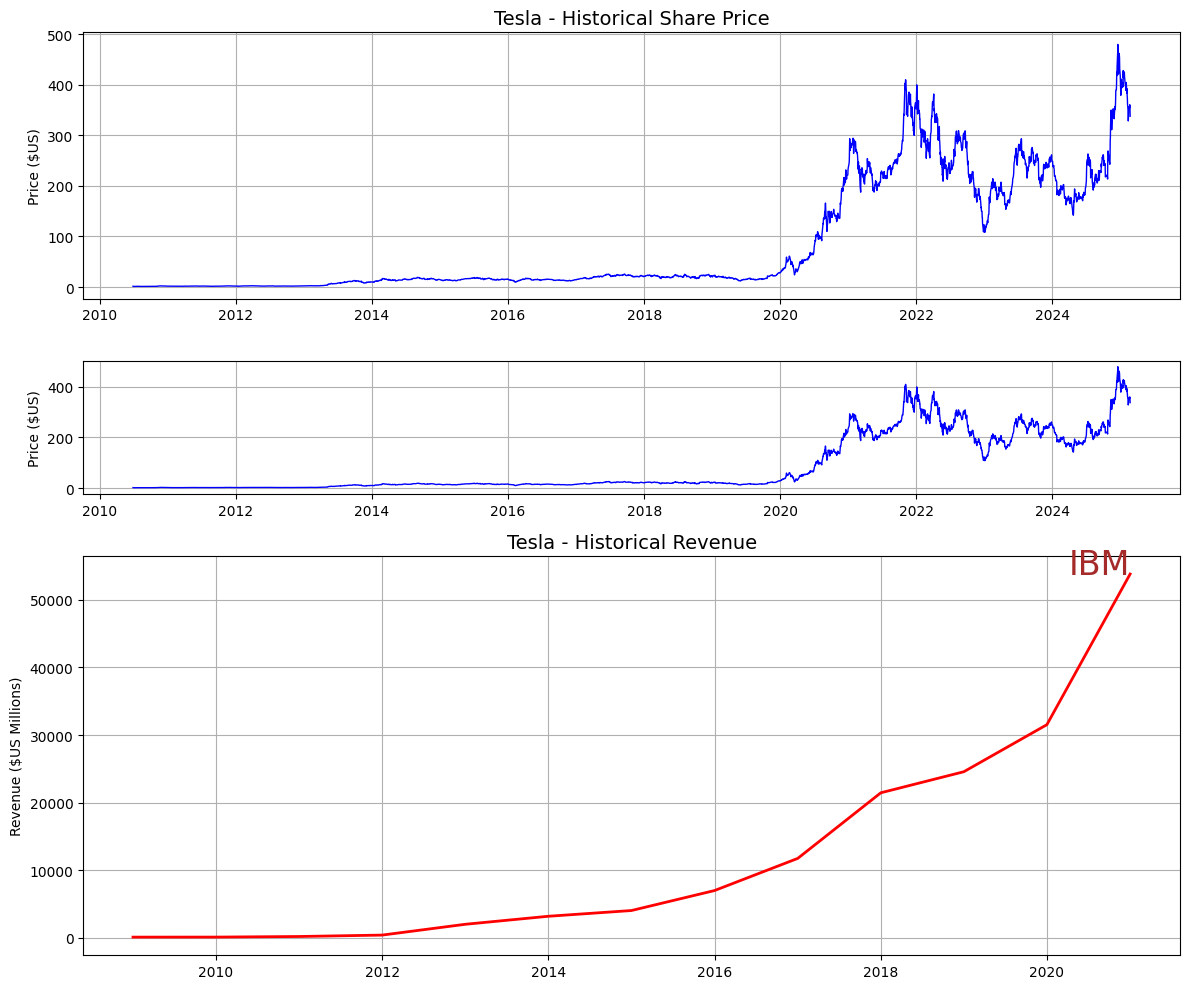

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from bs4 import BeautifulSoup
import requests

# Function to get stock data
def get_stock_data(ticker, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d')):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

# Function to scrape revenue data
def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")

    revenue_data = []
    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace(",", "").replace("$", "")
                
                # Fixing incorrect date formats (removing stray characters)
                if len(date) == 7:  # Cases like "-09-30"
                    date = "20" + date  # Assuming all data is from 2000s+
                
                if revenue.isdigit():
                    revenue_data.append([date, int(revenue)])

    # Create DataFrame and convert dates properly
    revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"], errors='coerce')  # Converts bad dates to NaT
    revenue_df.dropna(subset=["Date"], inplace=True)  # Removes any rows with NaT dates
    revenue_df.sort_values("Date", inplace=True)
    
    return revenue_df

# Function to create Tesla stock and revenue graphs
def make_graph(stock_data, revenue_data, company_name):
    fig, axs = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1, 3]})

    # Stock Price Plot
    axs[0].plot(stock_data.index, stock_data['Close'], color="blue", linewidth=1)
    axs[0].set_title(f"{company_name} - Historical Share Price", fontsize=14)
    axs[0].set_ylabel("Price ($US)")
    axs[0].grid(True)

    # Zoomed-in Stock Price
    axs[1].plot(stock_data.index, stock_data['Close'], color="blue", linewidth=1)
    axs[1].set_ylabel("Price ($US)")
    axs[1].grid(True)

    # Revenue Plot
    axs[2].plot(revenue_data["Date"], revenue_data["Revenue"], color="red", linewidth=2)
    axs[2].set_title(f"{company_name} - Historical Revenue", fontsize=14)
    axs[2].set_ylabel("Revenue ($US Millions)")
    axs[2].grid(True)

    # IBM watermark
    axs[2].text(revenue_data["Date"].max(), revenue_data["Revenue"].max(), "IBM", fontsize=24, color="brown", ha="right")

    plt.tight_layout()
    plt.show()

# Get Tesla data
tesla_data = get_stock_data("TSLA")
tesla_revenue = get_revenue_data("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm")

# Create Tesla graph
make_graph(tesla_data, tesla_revenue, "Tesla")




[*********************100%***********************]  1 of 1 completed


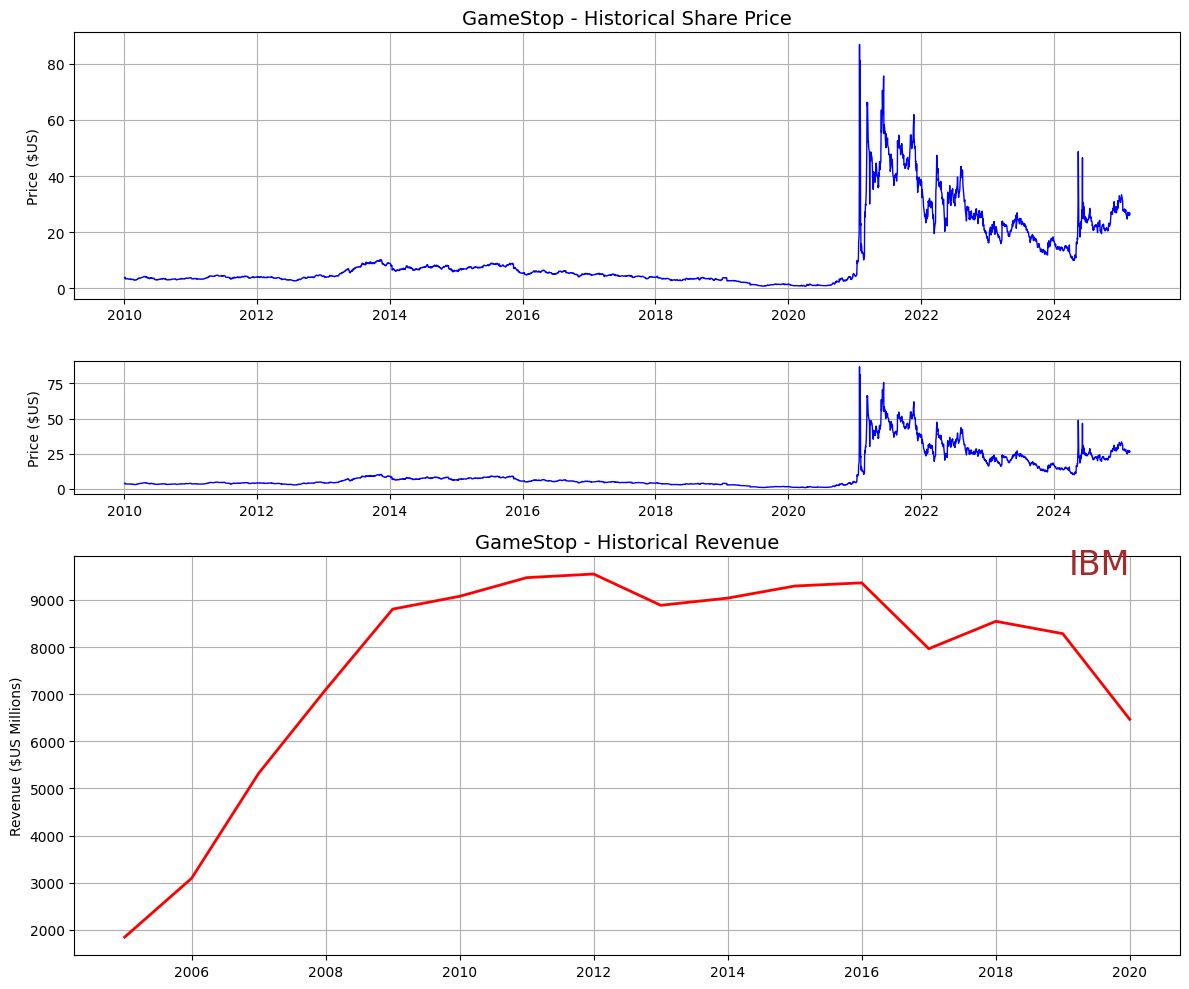

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime
from bs4 import BeautifulSoup
import requests

# Function to get stock data
def get_stock_data(ticker, start="2010-01-01", end=datetime.today().strftime('%Y-%m-%d')):
    stock_data = yf.download(ticker, start=start, end=end)
    return stock_data

# Function to scrape revenue data
def get_revenue_data(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")
    tables = soup.find_all("table")

    revenue_data = []
    for table in tables:
        rows = table.find_all("tr")
        for row in rows:
            cols = row.find_all("td")
            if len(cols) == 2:
                date = cols[0].text.strip()
                revenue = cols[1].text.strip().replace(",", "").replace("$", "")
                
                # Fixing incorrect date formats (removing stray characters)
                if len(date) == 7:  # Cases like "-09-30"
                    date = "20" + date  # Assuming all data is from 2000s+
                
                if revenue.isdigit():
                    revenue_data.append([date, int(revenue)])

    # Create DataFrame and convert dates properly
    revenue_df = pd.DataFrame(revenue_data, columns=["Date", "Revenue"])
    revenue_df["Date"] = pd.to_datetime(revenue_df["Date"], errors='coerce')  # Converts bad dates to NaT
    revenue_df.dropna(subset=["Date"], inplace=True)  # Removes any rows with NaT dates
    revenue_df.sort_values("Date", inplace=True)
    
    return revenue_df

# Function to create Tesla stock and revenue graphs
def make_graph(stock_data, revenue_data, company_name):
    fig, axs = plt.subplots(3, 1, figsize=(12, 10), gridspec_kw={'height_ratios': [2, 1, 3]})

    # Stock Price Plot
    axs[0].plot(stock_data.index, stock_data['Close'], color="blue", linewidth=1)
    axs[0].set_title(f"{company_name} - Historical Share Price", fontsize=14)
    axs[0].set_ylabel("Price ($US)")
    axs[0].grid(True)

    # Zoomed-in Stock Price
    axs[1].plot(stock_data.index, stock_data['Close'], color="blue", linewidth=1)
    axs[1].set_ylabel("Price ($US)")
    axs[1].grid(True)

    # Revenue Plot
    axs[2].plot(revenue_data["Date"], revenue_data["Revenue"], color="red", linewidth=2)
    axs[2].set_title(f"{company_name} - Historical Revenue", fontsize=14)
    axs[2].set_ylabel("Revenue ($US Millions)")
    axs[2].grid(True)

    # IBM watermark
    axs[2].text(revenue_data["Date"].max(), revenue_data["Revenue"].max(), "IBM", fontsize=24, color="brown", ha="right")

    plt.tight_layout()
    plt.show()

gme_data = get_stock_data("GME")
gme_revenue = get_revenue_data("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html")

make_graph(gme_data, gme_revenue, "GameStop")


